### Lab-6 : Self-Practice

In this week self practice, you will apply [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) on multi-class problem. In the following 3-class generated blobs you will train SVCs in a one-vs-one and one-vs-rest approach. Draw the decision bounderies of each approach.

#### Question: Recall what the difference between one-vs-one and on-vs-rest for multiclass classification is. 

In [4]:
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt
import numpy as np

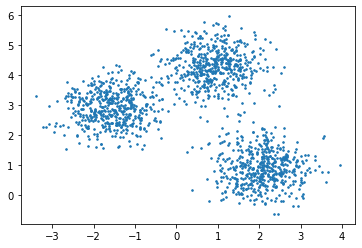

In [14]:
# we create the dataset
X, y = make_blobs(n_samples=1500, centers=3, n_features=2, cluster_std=0.60,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1],  marker=".", s=10)

In [29]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.predict(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])


    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Create a svc model to classify the data point using one-vs-one approach and draw the desicion bounderies (hyperplan and margins)

In [44]:
# Your code here
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

model1 = OneVsOneClassifier(SVC())
model1.fit(X, y)

OneVsOneClassifier(estimator=SVC())

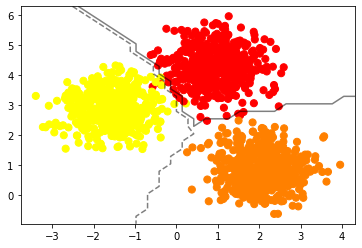

In [45]:

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model1);

### Create a svc model to classify the data points using one-vs-rest approach and draw the desicion bounderies

In [42]:
# Your code here

model2 = OneVsRestClassifier(SVC())
model2.fit(X, y)

OneVsRestClassifier(estimator=SVC())

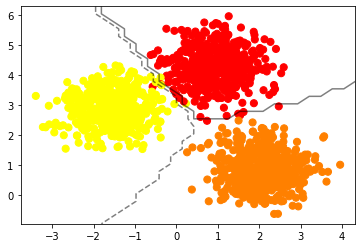

In [43]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model2);

### Using 5-fold cross validation compare the accuracies of each method

In [48]:
# Your code here
from sklearn.model_selection import cross_val_score

model1 = OneVsOneClassifier(SVC())
model2 = OneVsRestClassifier(SVC())

score1 = np.mean(cross_val_score(model1, X, y, scoring='accuracy'))
score2 = np.mean(cross_val_score(model2, X, y, scoring='accuracy'))

print(score1, score2)

0.9973333333333333 0.9973333333333333
